<a href="https://colab.research.google.com/github/Crispardo06/Problema-del-viajero-/blob/main/Problema_del_viajero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

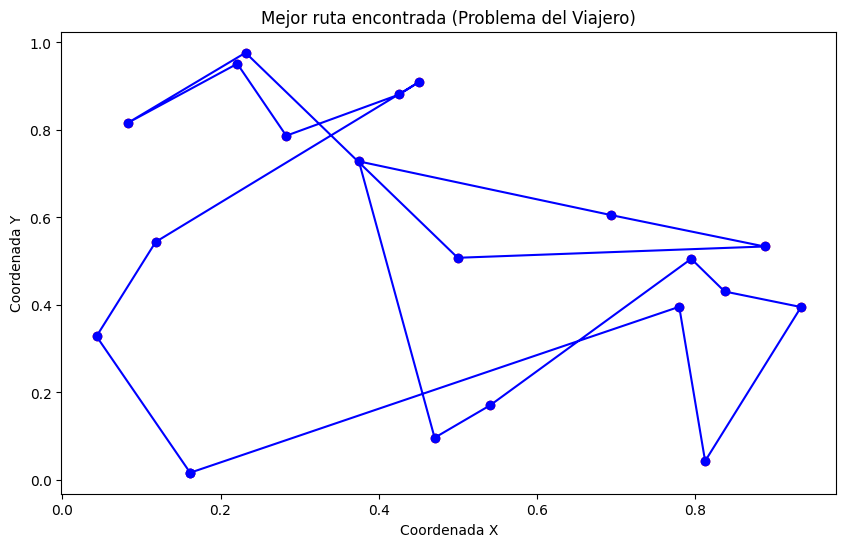

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Genera coordenadas aleatorias para las ciudades
def generar_ciudades(num_ciudades):
    return np.random.rand(num_ciudades, 2)

# Calcula la distancia entre todas las ciudades
def distancia_total(ruta, ciudades):
    return sum(np.linalg.norm(ciudades[ruta[i]] - ciudades[ruta[i + 1]]) for i in range(len(ruta) - 1)) + np.linalg.norm(ciudades[ruta[-1]] - ciudades[ruta[0]])

# Inicializa la población con rutas aleatorias
def crear_población_inicial(ciudades, num_poblacion):
    num_ciudades = len(ciudades)
    return [random.sample(range(num_ciudades), num_ciudades) for _ in range(num_poblacion)]

# Calcula la aptitud de cada individuo (inverso de la distancia total)
def calcular_aptitud(población, ciudades):
    return [1 / distancia_total(ruta, ciudades) for ruta in población]

# Selección de padres usando selección por torneo
def seleccionar_padres(población, aptitudes, num_padres):
    padres = []
    for _ in range(num_padres):
        i, j = random.sample(range(len(población)), 2)
        padres.append(población[i] if aptitudes[i] > aptitudes[j] else población[j])
    return padres

# Cruce de orden (Order Crossover - OX)
def cruce_ox(padre1, padre2):
    size = len(padre1)
    start, end = sorted(random.sample(range(size), 2))
    hijo = [None] * size
    hijo[start:end] = padre1[start:end]
    pos = end
    for gene in padre2:
        if gene not in hijo:
            if pos == size:
                pos = 0
            hijo[pos] = gene
            pos += 1
    return hijo

# Mutación que intercambia dos ciudades al azar
def mutar(ruta, tasa_mutación):
    if random.random() < tasa_mutación:
        i, j = random.sample(range(len(ruta)), 2)
        ruta[i], ruta[j] = ruta[j], ruta[i]
    return ruta

# Reemplazo de la población con la nueva generación
def reemplazar_población(población, descendencia):
    return descendencia

# Encuentra la mejor ruta en la población
def encontrar_mejor_ruta(población, ciudades):
    mejor_ruta = min(población, key=lambda ruta: distancia_total(ruta, ciudades))
    return mejor_ruta

# Algoritmo genético para resolver el problema del viajero
def programacion_genetica_viajero(ciudades, num_poblacion, num_generaciones, tasa_mutación):
    población = crear_población_inicial(ciudades, num_poblacion)
    mejores_rutas = []

    for _ in range(num_generaciones):
        aptitudes = calcular_aptitud(población, ciudades)
        padres = seleccionar_padres(población, aptitudes, num_poblacion)

        descendencia = []
        for i in range(0, len(padres), 2):
            padre1, padre2 = padres[i], padres[i + 1]
            hijo1 = cruce_ox(padre1, padre2)
            hijo2 = cruce_ox(padre2, padre1)
            descendencia.extend([mutar(hijo1, tasa_mutación), mutar(hijo2, tasa_mutación)])

        población = reemplazar_población(población, descendencia)
        mejor_ruta = encontrar_mejor_ruta(población, ciudades)
        mejores_rutas.append(mejor_ruta)

    return mejor_ruta, mejores_rutas

# Graficar la mejor ruta encontrada
def graficar_ruta(ciudades, mejor_ruta):
    plt.figure(figsize=(10, 6))
    ruta_ciudades = np.array([ciudades[i] for i in mejor_ruta + [mejor_ruta[0]]])  # Ruta cerrada
    plt.plot(ruta_ciudades[:, 0], ruta_ciudades[:, 1], marker='o', color='b')
    plt.scatter(ciudades[:, 0], ciudades[:, 1], color='red')
    plt.title("Mejor ruta encontrada (Problema del Viajero)")
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.show()

# Parámetros
num_ciudades = 20
num_poblacion = 100
num_generaciones = 500
tasa_mutación = 0.1

# Generar ciudades y ejecutar el algoritmo genético
ciudades = generar_ciudades(num_ciudades)
mejor_ruta, mejores_rutas = programacion_genetica_viajero(ciudades, num_poblacion, num_generaciones, tasa_mutación)

# Graficar la mejor ruta encontrada
graficar_ruta(ciudades, mejor_ruta)